<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-tpf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [2]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np

import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


# target pixel file (TPF)

In [3]:
t = cr.Tpf(toiid=837)

Target: TOI 837
Available sectors: [10 11]
Using sector=10.



Searching mast for TIC 460205581

2 tpf(s) found in sector(s) [10, 11]
Using data from sector 10 only




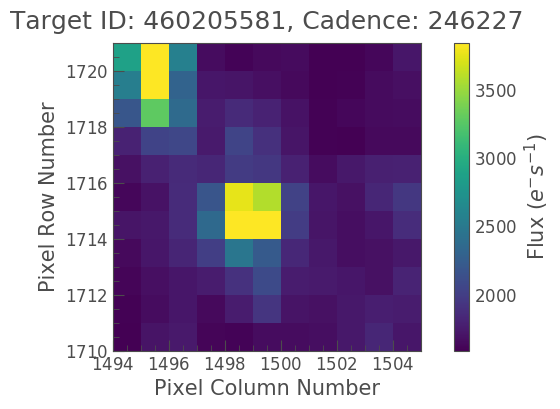

In [4]:
tpf = t.get_tpf()
tpf.plot()

## pipeline mask

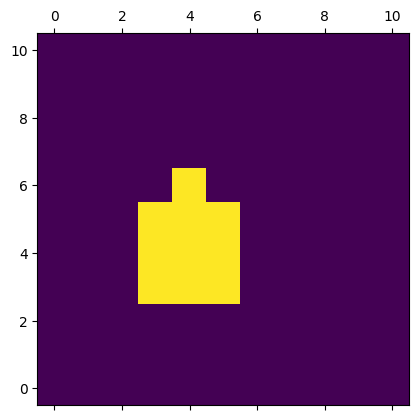

In [5]:
mask = t.tpf.pipeline_mask
pl.matshow(mask, origin='lower')

## custom mask

aperture photometry mask: square (1x1 pix)

Brightest star detected is far from the center.
Aperture mask is placed at the center instead.



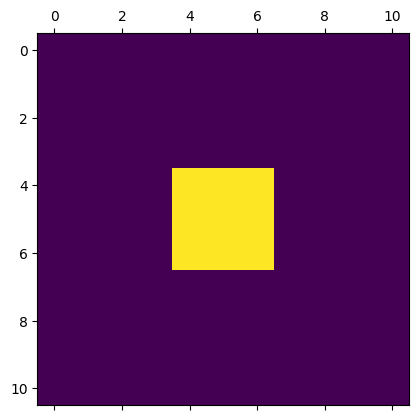

In [6]:
mask = t.get_aper_mask(sap_mask="square")
pl.matshow(mask)

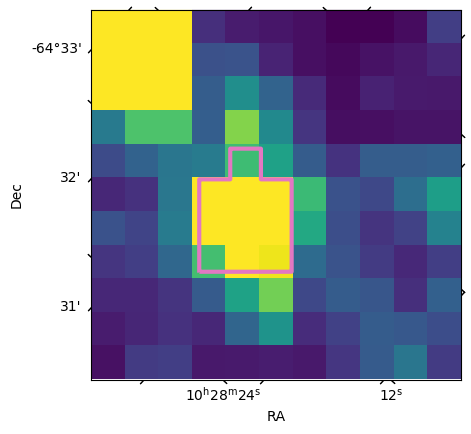

In [7]:
ax = cr.plot_aperture_outline(t.tpf.flux.mean(axis=0), 
                            imgwcs=t.tpf.wcs,
                            mask=t.tpf.pipeline_mask
                                )

## gaia sources

Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 90.0 arcsec.


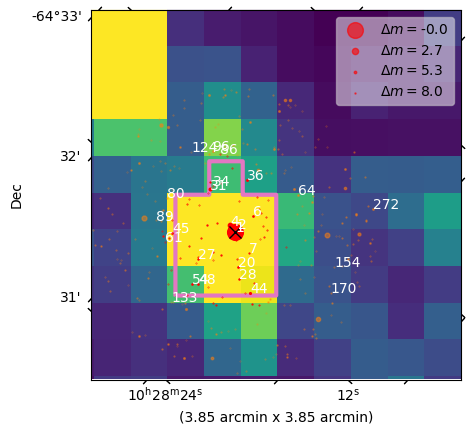

In [8]:
#query gaia sources 1.5 arcmin around the target 
gaia_sources = t.query_gaia_dr2_catalog(radius=90)
gaiaid = gaia_sources.iloc[0]['source_id']

ax = cr.plot_gaia_sources_on_tpf(t.tpf, 
                                 sap_mask='pipeline',
                                 target_gaiaid=gaiaid, 
                                 gaia_sources=gaia_sources
                                )

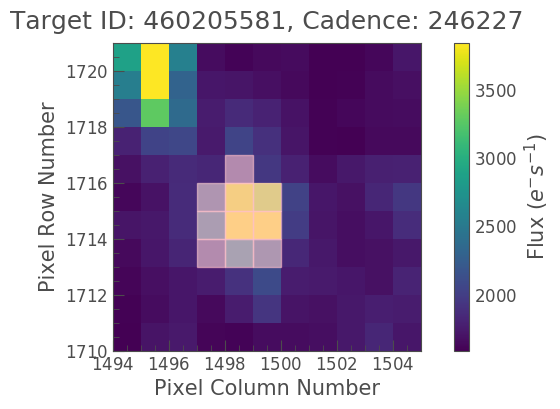

In [9]:
t.tpf.plot(aperture_mask=t.tpf.pipeline_mask)

## contamination
compute flux ratios based on delta magnitude between star within aperture and the brightest star (not necessarily the target)

In [10]:
gaia_sources = t.query_gaia_dr2_catalog(radius=120) 
fluxes = cr.get_fluxes_within_mask(tpf, mask, gaia_sources)

#flux ratios of stars within aperture (relative to the brightest star)
len(fluxes)

Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 120.0 arcsec.


63

In [11]:
sum(fluxes)-1 #minus one removes the contribution of brightest star

0.0823451947550351

In [12]:
gaia_sources = t.query_gaia_dr2_catalog(radius=90)
gaiaid = gaia_sources.iloc[0]['source_id']

Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 90.0 arcsec.


In [13]:
fluxes = cr.get_fluxes_within_mask(t.tpf, aper_mask=mask, gaia_sources=gaia_sources)
contratio = sum(fluxes)-1
print(f'{contratio*100:.2f}%')

8.23%


In [14]:
#compare to TIC contamination ratio
tic_params = t.query_tic_catalog(return_nearest_xmatch=True)
f"{tic_params['contratio']*100:.2f}%"

Querying TIC catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.
There are 2 TIC stars within 3.0 arcsec


'12.99%'

In [15]:
tic_params['contratio']-contratio

0.04754079124496491

The ~5% difference may be attributable to the difference of aperture mask used in TIC catalog (is it fixed?) relative to the aperture I used here. 

## interactive

In [16]:
clean_lc = lambda x : x.remove_nans().remove_outliers().normalize()

tpf.interact(transform_func=clean_lc)

# FFI cutout

In [17]:
t = cr.FFI_cutout(toiid=837, cutout_size=(10,10))

Target: TOI 837
Available sectors: [10 11]
Using sector=10.


Searching targetpixelfile for ra,dec=(157.037 -64.5052) using Tesscut


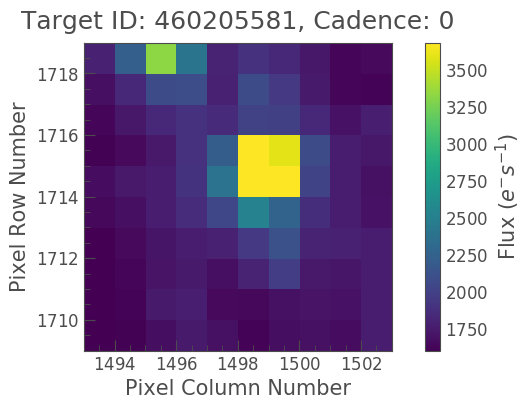

In [18]:
tpf = t.get_tpf_tesscut()
tpf.plot()

## custom mask

aperture photometry mask: square (1x1 pix)



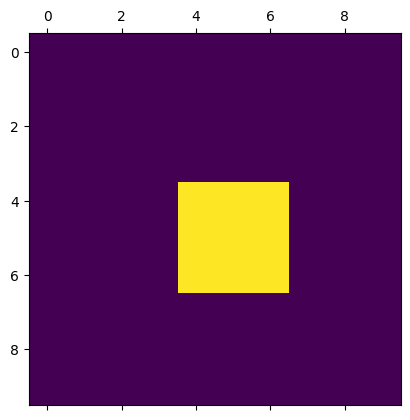

In [19]:
mask = t.get_aper_mask(sap_mask="square")
pl.matshow(mask)

## interactive

In [20]:
clean_lc = lambda x : x.remove_nans().remove_outliers().normalize()

tpf.interact(transform_func=clean_lc)

No pixels in `aperture_mask`, finding optimum aperture using `tpf.create_threshold_mask`.
ERROR:lightkurve.interact:No pixels in `aperture_mask`, finding optimum aperture using `tpf.create_threshold_mask`.


ERROR:tornado.application:Uncaught exception GET /ws (::1)
HTTPServerRequest(protocol='http', host='localhost:36777', method='GET', uri='/ws', version='HTTP/1.1', remote_ip='::1')
Traceback (most recent call last):
  File "/home/jp/miniconda3/envs/py3/lib/python3.7/site-packages/tornado/websocket.py", line 956, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "/home/jp/miniconda3/envs/py3/lib/python3.7/site-packages/bokeh/server/views/ws.py", line 135, in open
    raise ProtocolError("Token is expired.")
bokeh.protocol.exceptions.ProtocolError: Token is expired.
ERROR:tornado.application:Uncaught exception GET /ws (::1)
HTTPServerRequest(protocol='http', host='localhost:46801', method='GET', uri='/ws', version='HTTP/1.1', remote_ip='::1')
Traceback (most recent call last):
  File "/home/jp/miniconda3/envs/py3/lib/python3.7/site-packages/tornado/websocket.py", line 956, in _accept_connection
    open_result = handler.open(*handler.op

# See also
* examples-triceratops.ipynb